<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/kaggle_car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv_path = '/content/drive/MyDrive/Colab Notebooks/udemy - ml workout/DL and ML Practical Tutorials - Package/Project 1/Car_Purchasing_Data.csv'

df = pd.read_csv(csv_path, encoding = 'ISO-8859-1')
df.sample(10)

Customer Name  ... Car Purchase Amount
126            Chaim Lewis  ...         64391.68906
23           Micah Wheeler  ...         46635.49432
114            Victor Yang  ...         30240.60975
488                Neville  ...         41984.62412
109             Wing Parks  ...         54973.02495
40           Rachel Ashley  ...         45805.67186
253  Shaeleigh M. Mckenzie  ...         37093.92033
357      Jenkins, Hasad P.  ...         39270.57909
439               Demetria  ...         39135.03023
285       Kirestin F. Yang  ...         50441.62427

[10 rows x 9 columns]

In [ ]:
pip install sweetviz

In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 266kB 5.8MB/s 
     |████████████████████████████████| 604kB 22.9MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 3.1MB 41.8MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 296kB 38.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=2526552da6584289271f1b4c5380a80247fcf55d293af4f5c3b4fa347afa3ae8
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df = df, explorative = True, dark_mode = True)

profile

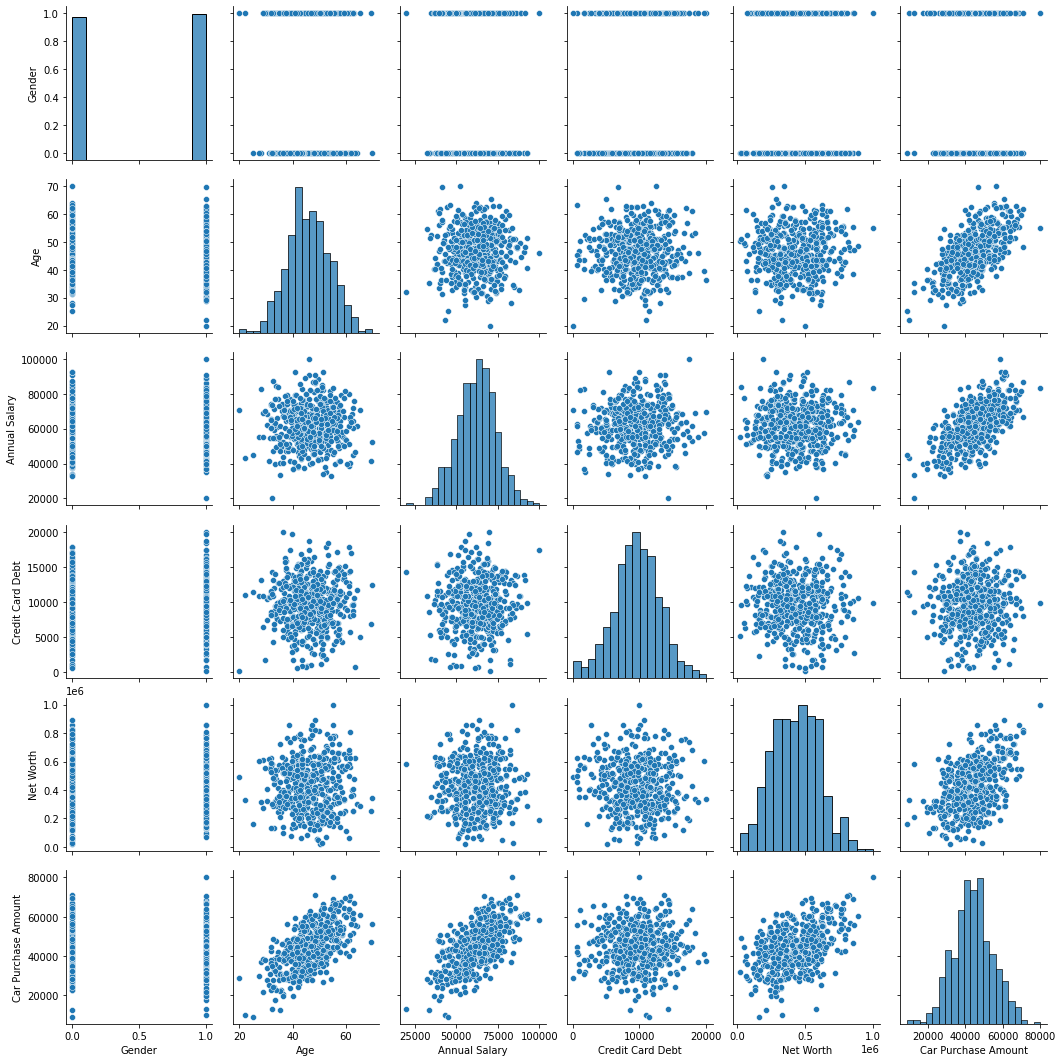

In [ ]:
sns.pairplot(df)

In [ ]:
# car purchase amount is to be predicted.
# split into train and test, X and y

1.car purchase amount is to be predicted. 

2.split into train and test, X and y

---



In [ ]:
np.random.randint(
    low = 0,
    high = df.shape[0],
    size = np.int(np.round(df.shape[0]*.8))
    )

In [ ]:
np.arange(0,500)

In [ ]:
train_index = np.random.randint(
    low = 0,
    high = df.shape[0],
    size = np.int(np.round(df.shape[0]*.8))
    ) 
test_index = np.arange(0, 501)

print(train_index,'\n',
test_index)


In [ ]:
np.setdiff1d(ar2 = train_index, ar1 = test_index)

In [ ]:
df.sample()

In [ ]:
df.select_dtypes(include = [np.int, np.float])

In [ ]:
X = df.select_dtypes(include = [np.int, np.float]).drop(columns = ['Car Purchase Amount'])
y = df[['Car Purchase Amount']]

X

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
..      ...        ...            ...               ...          ...
495       0  41.462515    71942.40291       6995.902524  541670.1016
496       1  37.642000    56039.49793      12301.456790  360419.0988
497       1  53.943497    68888.77805      10611.606860  764531.3203
498       1  59.160509    49811.99062      14013.034510  337826.6382
499       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]

In [ ]:
y

Car Purchase Amount
0            35321.45877
1            45115.52566
2            42925.70921
3            67422.36313
4            55915.46248
..                   ...
495          48901.44342
496          31491.41457
497          64147.28888
498          45442.15353
499          45107.22566

[500 rows x 1 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
scaler_x = MinMaxScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [ ]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

In [ ]:
X_train_scaled.shape

(375, 5)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(100, input_dim = X_train_scaled.shape[1], activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
epochs_hist = model.fit(X_train_scaled, y_train_scaled, epochs = 100, batch_size = 40, validation_split = 0.2) 

Epoch 1/100
8/8 [==============================] - 0s 19ms/step - loss: 6.2694e-06 - val_loss: 8.9725e-06
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 6.6141e-06 - val_loss: 6.4125e-06
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 6.5125e-06 - val_loss: 6.5314e-06
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 6.3442e-06 - val_loss: 5.0918e-06
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 5.1725e-06 - val_loss: 4.7323e-06
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 4.2332e-06 - val_loss: 5.6671e-06
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 4.3231e-06 - val_loss: 5.5456e-06
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 4.6601e-06 - val_loss: 5.1178e-06
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 4.0734e-06 - val_loss: 4.8584e-06
Epoch 10/100
8/8 [==============================] - 0s

In [ ]:
yhat = scaler_y.inverse_transform(model.predict(X_test_scaled))

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

No handles with labels found to put in legend.


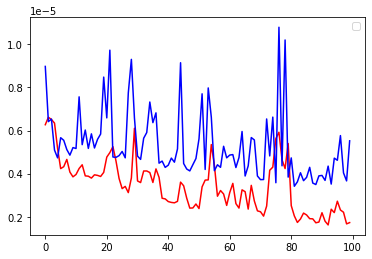

In [ ]:
plt.plot(epochs_hist.history['loss'], color = 'r')
plt.plot(epochs_hist.history['val_loss'], color = 'b')
plt.legend()
plt.show()

In [ ]:
preds_df = y_test.reset_index(drop = True).join(pd.DataFrame(yhat, columns = ['yhat']))

No handles with labels found to put in legend.


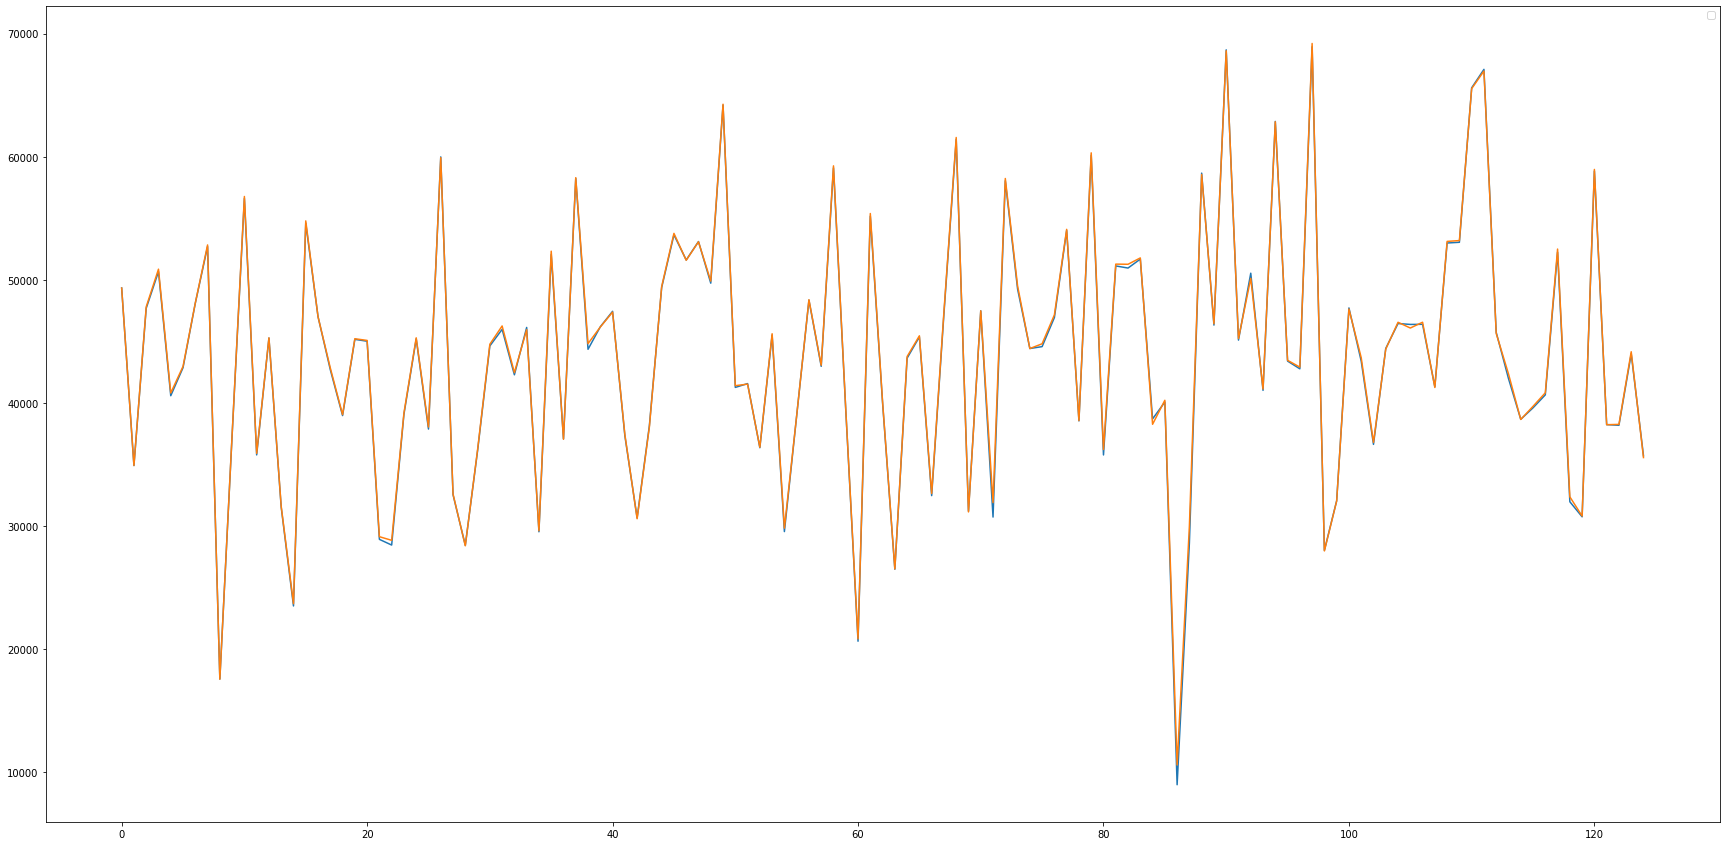

In [ ]:
plt.figure(figsize = (30,15))
plt.plot(preds_df)
plt.legend()
plt.show()

In [ ]:
fr